In [3]:
!Which python

/opt/anaconda3/envs/ml_/bin/python


In [74]:
# !pip install scikit-learn

In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [36]:
df = pd.read_csv('../data/telco_customer_churn.csv')

In [37]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [38]:
df.head(3).T

0             1               2
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK
gender                      Female          Male            Male
SeniorCitizen                    0             0               0
Partner                        Yes            No              No
Dependents                      No            No              No
tenure                           1            34               2
PhoneService                    No           Yes             Yes
MultipleLines     No phone service            No              No
InternetService                DSL           DSL             DSL
OnlineSecurity                  No           Yes             Yes
OnlineBackup                   Yes            No             Yes
DeviceProtection                No           Yes              No
TechSupport                     No            No              No
StreamingTV                     No            No              No
StreamingMovies                 No            No              No
Contract            Month-to-month      One year  Month-to-month
PaperlessBilling               Yes            No             Yes
PaymentMethod     Electronic check  Mailed check    Mailed check
MonthlyCharges               29.85         56.95           53.85
TotalCharges                 29.85        1889.5          108.15
Churn                           No            No             Yes

In [39]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [40]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [41]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [42]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [43]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [31]:
# df.totalcharges = pd.to_numeric(df.totalcharges)
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [44]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [54]:
df[tc.isnull()][['customerid', 'totalcharges']].count()

customerid      11
totalcharges    11
dtype: int64

In [55]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [59]:
df[df.totalcharges.isna()]

customerid  gender  seniorcitizen partner dependents  tenure  \
488   4472-lvygi  female              0     yes        yes       0   
753   3115-czmzd    male              0      no        yes       0   
936   5709-lvoeq  female              0     yes        yes       0   
1082  4367-nuyao    male              0     yes        yes       0   
1340  1371-dwpaz  female              0     yes        yes       0   
3331  7644-omvmy    male              0     yes        yes       0   
3826  3213-vvolg    male              0     yes        yes       0   
4380  2520-sgtta  female              0     yes        yes       0   
5218  2923-arzlg    male              0     yes        yes       0   
6670  4075-wkniu  female              0     yes        yes       0   
6754  2775-sefee    male              0      no        yes       0   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
488            no  no_phone_service             dsl                  yes  ...   
753           yes                no              no  no_internet_service  ...   
936           yes                no             dsl                  yes  ...   
1082          yes               yes              no  no_internet_service  ...   
1340           no  no_phone_service             dsl                  yes  ...   
3331          yes                no              no  no_internet_service  ...   
3826          yes               yes              no  no_internet_service  ...   
4380          yes                no              no  no_internet_service  ...   
5218          yes                no              no  no_internet_service  ...   
6670          yes               yes             dsl                   no  ...   
6754          yes               yes             dsl                  yes  ...   

         deviceprotection          techsupport          streamingtv  \
488                   yes                  yes                  yes   
753   no_internet_service  no_internet_service  no_internet_service   
936                   yes                   no                  yes   
1082  no_internet_service  no_internet_service  no_internet_service   
1340                  yes                  yes                  yes   
3331  no_internet_service  no_internet_service  no_internet_service   
3826  no_internet_service  no_internet_service  no_internet_service   
4380  no_internet_service  no_internet_service  no_internet_service   
5218  no_internet_service  no_internet_service  no_internet_service   
6670                  yes                  yes                  yes   
6754                   no                  yes                   no   

          streamingmovies  contract paperlessbilling  \
488                    no  two_year              yes   
753   no_internet_service  two_year               no   
936                   yes  two_year               no   
1082  no_internet_service  two_year               no   
1340                   no  two_year               no   
3331  no_internet_service  two_year               no   
3826  no_internet_service  two_year               no   
4380  no_internet_service  two_year               no   
5218  no_internet_service  one_year              yes   
6670                   no  two_year               no   
6754                   no  two_year              yes   

                  paymentmethod monthlycharges  totalcharges  churn  
488   bank_transfer_(automatic)          52.55           NaN     no  
753                mailed_check          20.25           NaN     no  
936                mailed_check          80.85           NaN     no  
1082               mailed_check          25.75           NaN     no  
1340    credit_card_(automatic)          56.05           NaN     no  
3331               mailed_check          19.85           NaN     no  
3826               mailed_check          25.35           NaN     no  
4380               mailed_check          20.00           NaN     no  
5218               mailed_check     

In [60]:
# Fill up total charges with 0, this isnt always the best approach, but thinking about it
# And its business implications regarding business requirements can inform your decision
df.totalcharges = df.totalcharges.fillna(0)

In [62]:
# Now lets look atht the churn variable

df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [63]:
df.churn.nunique()

2

In [67]:
df.churn = (df.churn == 'yes').astype(int)

In [68]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [71]:
df.head(3).T.tail(3)

0       1       2
monthlycharges  29.85   56.95   53.85
totalcharges    29.85  1889.5  108.15
churn               0       0       1

### 3.3 Setting up the validation framework

In [77]:
# train_test_split?

In [78]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [80]:
len(df_test), len(df_full_train) # i.e 20%, 80% respectively

(1409, 5634)

In [81]:
# Note, in other to get 20% for validation set from original df, we can say we need 20/80 i.e 1/4
# of original i.e 0.25, or just take 1409/5635 ~ 0.25 of the 80% df_full_train

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [82]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [84]:
# Reset index to make dfs look cleaner
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [86]:
df_val.head(3)

customerid gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5846-neqvz   male              0     yes        yes      71          yes   
1  3645-deygf   male              0      no        yes       1          yes   
2  3590-tcxtb   male              0      no         no       1          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no             dsl                  yes  ...   
1            no              no  no_internet_service  ...   
2            no              no  no_internet_service  ...   

      deviceprotection          techsupport          streamingtv  \
0                  yes                  yes                   no   
1  no_internet_service  no_internet_service  no_internet_service   
2  no_internet_service  no_internet_service  no_internet_service   

       streamingmovies        contract paperlessbilling  \
0                  yes        two_year              yes   
1  no_internet_service  month-to-month               no   
2  no_internet_service  month-to-month               no   

             paymentmethod monthlycharges  totalcharges  churn  
0  credit_card_(automatic)          70.85       4973.40      0  
1             mailed_check          20.75         20.75      0  
2             mailed_check          20.35         20.35      0  

[3 rows x 21 columns]

In [87]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [88]:
y_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [90]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [91]:
df_val.head(3)

customerid gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5846-neqvz   male              0     yes        yes      71          yes   
1  3645-deygf   male              0      no        yes       1          yes   
2  3590-tcxtb   male              0      no         no       1          yes   

  multiplelines internetservice       onlinesecurity         onlinebackup  \
0            no             dsl                  yes                   no   
1            no              no  no_internet_service  no_internet_service   
2            no              no  no_internet_service  no_internet_service   

      deviceprotection          techsupport          streamingtv  \
0                  yes                  yes                   no   
1  no_internet_service  no_internet_service  no_internet_service   
2  no_internet_service  no_internet_service  no_internet_service   

       streamingmovies        contract paperlessbilling  \
0                  yes        two_year              yes   
1  no_internet_service  month-to-month               no   
2  no_internet_service  month-to-month               no   

             paymentmethod  monthlycharges  totalcharges  
0  credit_card_(automatic)           70.85       4973.40  
1             mailed_check           20.75         20.75  
2             mailed_check           20.35         20.35

#### 3.4: EDA

In [92]:
# We'll usw the df_full_train for the EDA

In [94]:
df_full_train = df_full_train.reset_index(drop=True)

In [95]:
df_full_train.head(3)

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  

[3 rows x 21 columns]

In [98]:
# Let's look at the distribution of the target variables

df_full_train.churn.value_counts(normalize=True) #Look at it % wise to get the value counts in terms of percentages

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [102]:
# We can also calculate the mean to get the churn rate since its a binary problem

global_churn_rate = np.round(df_full_train.churn.mean(),2).item() # -> Churn rate 27%

In [103]:
global_churn_rate

0.27

In [104]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [105]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [106]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [109]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'
]

In [110]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### 3.5: Feature Importance

In [112]:
# Let's look at the churn rate for different groups/demographics
# Gender Checks...

churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
np.round(churn_female,2).item()

0.28

In [113]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
np.round(churn_male,2).item()

0.26

In [ ]:
# Partner Checks....

In [114]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
np.round(churn_partner,2).item()

0.21

In [115]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
np.round(churn_no_partner,2).item()

0.33

#### Now we can say, it doesnt really matter for male or females, churn rates are always approx same. But for those who have partner vs no partner, it does matter

In [116]:
# Risk Ratio

churn_no_partner / global_churn_rate # -> Churn rate 22% higher than global churn rate

np.float64(1.22151482997322)

In [118]:
churn_partner / global_churn_rate # -> Churn rate 25% lower than global churn rate

np.float64(0.7593826246675986)

In [129]:
from IPython.display import display

In [131]:
# Let's use group by to unify this...
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006824  1.025274
male    0.263214   2838 -0.006786  0.974865



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027730  0.897297
1              0.413377    912  0.143377  1.531027



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059809  1.221515
yes      0.205033   2702 -0.064967  0.759383



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043760  1.162074
yes         0.165666   1666 -0.104334  0.613579



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028684  0.893764
yes           0.273049   5087  0.003049  1.011292



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012593  0.953361
no_phone_service  0.241316    547 -0.028684  0.893764
yes               0.290742   2387  0.020742  1.076820



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077653  0.712398
fiber_optic      0.425171   2479  0.155171  1.574709
no               0.077805   1221 -0.192195  0.288167



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150921  1.558967
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.153226   1612 -0.116774  0.567503



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134323  1.497494
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.217232   1915 -0.052768  0.804564



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125875  1.466205
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.230412   1940 -0.039588  0.853379



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148914  1.551534
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.159926   1632 -0.110074  0.592320



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072832  1.269747
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.302723   2167  0.032723  1.121195



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068906  1.255209
no_internet_service  0.077805   1221 -0.192195  0.288167
yes                  0.307273   2200  0.037273  1.138047



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161701  1.598893
one_year        0.120573   1186 -0.149427  0.446568
two_year        0.028274   1344 -0.241726  0.104718



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097929  0.637300
yes               0.338151   3321  0.068151  1.252412



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101829  0.622854
credit_card_(automatic)    0.164339   1217 -0.105661  0.608661
electronic_check           0.455890   1893  0.185890  1.688482
mailed_check               0.193870   1305 -0.076130  0.718036

In [126]:
df_group

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006824  1.025274
male    0.263214   2838 -0.006786  0.974865

#### From this you can tell that a senior citizen customer with no partner nor dependents and a month-to-month contract is veryyy likely to churn and has high risk ratio which is usually above the global churn rate as calculated

### 3.6: Feature importance: Mutual Information

In [133]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [134]:
# The above tells us how much we know or can know about the churn variable by observing the contract variable and
# vice versa.., think of it as correlation when dealing with numbers...

In [137]:
# We can also test with gender which we already know doesnt give us much information.
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [139]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [ ]:
# We can deduce that partner is more important than gender but less important than contract

In [142]:
# Lets apply to all variables

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [148]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False) #Showing importance from highest
mi.sort_values(ascending=False)[:5] #First 5 important ones...

contract           0.098320
onlinesecurity     0.063085
techsupport        0.061032
internetservice    0.055868
onlinebackup       0.046923
dtype: float64

#### 3.7: Feature Importance: Correlation

In [149]:
# Let's now check correlation with numeric columns

In [150]:
# Tenure is how long a customer has stayed, here max is 72 months
df_full_train.tenure.max()

np.int64(72)

In [153]:
#  Checking how the numerical values correlate with churn
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [154]:
# So when tenure increases, the less likely they are to churn
# The more the total charges, the less likely to churn (Seems counter intuitive, but just tells you
# total charges would obviously be more when tenure is high)



In [156]:
df_full_train[df_full_train.tenure <= 2].churn.mean() #Churn rate is high for customers who spent 2 months or less

np.float64(0.5953420669577875)

#### 3.8: One-hot Encoding

In [158]:
# Lets use DictVectorizer for this

In [163]:
df_train[['gender', 'contract']].head(10)

gender        contract
0  female        two_year
1    male  month-to-month
2  female  month-to-month
3  female  month-to-month
4  female        two_year
5    male  month-to-month
6    male  month-to-month
7  female  month-to-month
8  female        two_year
9  female  month-to-month

In [179]:
# Targeting the gender and contract variables:

dicts = df_train[['gender', 'contract']].head(100).to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [180]:
dv = DictVectorizer() #Vectorizer turns our dictionary into vectors

In [181]:
dv.fit(dicts)

DictVectorizer()

In [182]:
dv.transform(dicts) #Sparse matrix provides a special way to encode data when there are many zeros as most values would be zeros in one-hot encoding

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

In [183]:
# Check Compressed Sparse Row formats online to know more...

In [195]:
dv = DictVectorizer(sparse=False) #Simply return a numpy array and not a sparse matrix

In [185]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [186]:
dv.transform(dicts) 

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [190]:
dv.get_feature_names_out() #Shows the order of features in the one hot encoding

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [191]:
# Now lets do for all records

In [192]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [371]:
train_dicts[:2]

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55}]

In [196]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [199]:
# Let's fit and immediately transform it for quicker mode

X_train = dv.fit_transform(train_dicts)

In [210]:
X_train[3]

array([  1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ,  80.85,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,
         1.  ,   0.  ,   0.  ,   5.  , 356.1 ])

In [211]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [212]:
X_train.shape

(4225, 45)

In [213]:
# Lets do same for our validation dataset

In [214]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [216]:
X_val = dv.transform(val_dicts) #No need to fit dv as it has already learned the kind of variables and how to one hot encode

In [217]:
X_val.shape

(1409, 45)

#### 3.9 Logistic Regression

In [218]:
# Let's draw the Logistic Regression Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [219]:
z = np.linspace(-5, 5, 51)

In [220]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

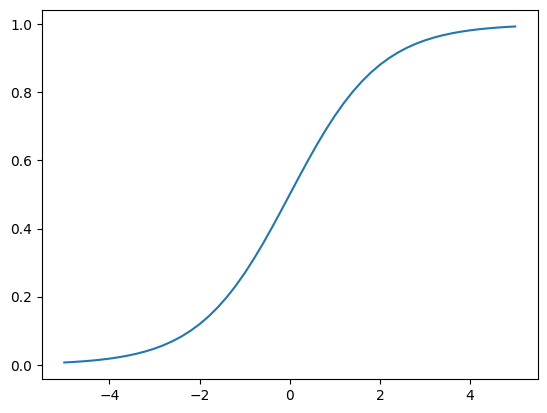

In [221]:
plt.plot(z, sigmoid(z))

In [222]:
# It always try to reach  y = 0, for negative x values, and y = 1 for positive x values 

In [225]:
# Let's try a very large +ve number

sigmoid(100000) # -> Always converges to 1

np.float64(1.0)

In [229]:
# Let's try a very large -ve number

sigmoid(-1000000) # -> Always converges to 0

/var/folders/xt/qdtg9n0d45qbj757bpskpg5m0000gn/T/ipykernel_10381/102985288.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


np.float64(0.0)

In [230]:
# Similar to Linear Regression
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j * w[j]]

    result = sigmoid(score)
    return result

#### 3.10: Training Logistic Regression

In [274]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [275]:
model.intercept_[0] #This is the w0

np.float64(-0.04985042590172659)

In [276]:
model.coef_[0].round(3) #Get the weights the w array

array([ 0.681,  0.03 , -0.681,  0.051, -0.021,  0.109, -0.157,  0.077,
        0.034, -0.004, -0.488,  0.674, -0.157, -0.017, -0.192,  0.07 ,
        0.152,  0.112, -0.157,  0.074,  0.281, -0.157, -0.095, -0.166,
        0.196, -0.049,  0.079, -0.054, -0.004,  0.103, -0.015,  0.07 ,
       -0.04 ,  0.193, -0.095, -0.157,  0.282, -0.055, -0.157,  0.242,
        0.231, -0.157, -0.044, -0.068,  0.   ])

In [277]:
model.predict(X_train) # This function gives the prediction by giving hard values (let's try out X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [278]:
# Now let's get the probabilities instead...
model.predict_proba(X_train) #Soft predictions

array([[0.92705903, 0.07294097],
       [0.32365271, 0.67634729],
       [0.36893864, 0.63106136],
       ...,
       [0.48736538, 0.51263462],
       [0.97441672, 0.02558328],
       [0.30637643, 0.69362357]], shape=(4225, 2))

In [279]:
# The second column gives us the probability of churning (1)
y_pred = model.predict_proba(X_val)[:, 1]

In [280]:
y_pred

array([0.00667838, 0.20460366, 0.21752855, ..., 0.15209917, 0.78834393,
       0.81194359], shape=(1409,))

In [281]:
# Now lets decide a threshold. We can use default of 0.5

In [282]:
churn_decision = (y_pred >= 0.5)

In [283]:
df_val[churn_decision].customerid #People who would likely churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [284]:
# Let's check the acuracy of our model using accuracy metric

y_val, y_pred.astype(int)

(array([0, 0, 0, ..., 0, 1, 1], shape=(1409,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(1409,)))

In [372]:
y_pred.astype(int)

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

In [286]:
# Let's use mean to check match
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

#### 3.11 Model Interpretation

In [287]:
# Remember dict vectoriser feature names
dv.get_feature_names_out() 

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [290]:
# Model weights
model.coef_[0].round(3) 

array([ 0.681,  0.03 , -0.681,  0.051, -0.021,  0.109, -0.157,  0.077,
        0.034, -0.004, -0.488,  0.674, -0.157, -0.017, -0.192,  0.07 ,
        0.152,  0.112, -0.157,  0.074,  0.281, -0.157, -0.095, -0.166,
        0.196, -0.049,  0.079, -0.054, -0.004,  0.103, -0.015,  0.07 ,
       -0.04 ,  0.193, -0.095, -0.157,  0.282, -0.055, -0.157,  0.242,
        0.231, -0.157, -0.044, -0.068,  0.   ])

In [294]:
dict(zip(dv.get_feature_names_out() , model.coef_[0].round(3))) # The learned weights

{'contract=month-to-month': np.float64(0.681),
 'contract=one_year': np.float64(0.03),
 'contract=two_year': np.float64(-0.681),
 'dependents=no': np.float64(0.051),
 'dependents=yes': np.float64(-0.021),
 'deviceprotection=no': np.float64(0.109),
 'deviceprotection=no_internet_service': np.float64(-0.157),
 'deviceprotection=yes': np.float64(0.077),
 'gender=female': np.float64(0.034),
 'gender=male': np.float64(-0.004),
 'internetservice=dsl': np.float64(-0.488),
 'internetservice=fiber_optic': np.float64(0.674),
 'internetservice=no': np.float64(-0.157),
 'monthlycharges': np.float64(-0.017),
 'multiplelines=no': np.float64(-0.192),
 'multiplelines=no_phone_service': np.float64(0.07),
 'multiplelines=yes': np.float64(0.152),
 'onlinebackup=no': np.float64(0.112),
 'onlinebackup=no_internet_service': np.float64(-0.157),
 'onlinebackup=yes': np.float64(0.074),
 'onlinesecurity=no': np.float64(0.281),
 'onlinesecurity=no_internet_service': np.float64(-0.157),
 'onlinesecurity=yes': np.

In [ ]:
# Let's try to train a smaller dataframe with fewer features. probably using the most important ones

In [296]:
small_features = ['contract', 'tenure', 'monthlycharges']

In [298]:
df_train[small_features].head(10)

contract  tenure  monthlycharges
0        two_year      72          115.50
1  month-to-month      10           95.25
2  month-to-month       5           75.55
3  month-to-month       5           80.85
4        two_year      18           20.10
5  month-to-month       4           30.50
6  month-to-month       1           75.10
7  month-to-month       1           70.30
8        two_year      72           19.75
9  month-to-month       6          109.90

In [301]:
dicts_train_small = df_train[small_features].to_dict(orient='records')
dicts_val_small = df_val[small_features].to_dict(orient='records')

In [303]:
dicts_val_small[:5]

[{'contract': 'two_year', 'tenure': 71, 'monthlycharges': 70.85},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.75},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.35},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 75.7},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 19.9}]

In [304]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [306]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [308]:
X_train_small = dv_small.transform(dicts_train_small)

In [309]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [319]:
w0 = model_small.intercept_[0] #Bias Term

In [316]:
w = model_small.coef_[0]

In [318]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [323]:
w0 # The bias term gives us an idea of what the churn would be without prior knowlwdge 

np.float64(-2.477957596265891)

In [324]:
# is the probability tells us the probibilty of churning without prior knowledge of anything
sigmoid(w0)

np.float64(0.07741795378050133)

In [322]:
w # The wirghts for each feature 

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [326]:
# We can test on  an arbitrary user with monthly charge 50, and tenure 5 months and month-to-month contract

-2.47 + (0.97 * 1) + (0.027 * 50) + (-0.036 * 5) 

-0.3300000000000001

In [330]:
#use prev cell out put as param, and this gives a prob of churning of 0.418 which is below threshold 
# of 0.5 and customer wont churn

sigmoid(_) 

np.float64(0.6561889549091209)

#### 3.12 Using the model

In [337]:
df_full_train.head(3)

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  

[3 rows x 21 columns]

In [338]:
y_full_train = df_full_train.churn.values

In [339]:
y_full_train

array([0, 1, 0, ..., 1, 1, 0], shape=(5634,))

In [350]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [331]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [335]:
dicts_full_train[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [340]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [342]:
model = LogisticRegression(max_iter=10000).fit(X_full_train, y_full_train)

In [343]:
model.intercept_[0]

np.float64(-0.15027039046658258)

In [345]:
model.coef_[0].round(3)

array([ 0.63 , -0.011, -0.763, -0.04 , -0.104,  0.038, -0.116, -0.066,
       -0.057, -0.088, -0.363,  0.334, -0.116,  0.002, -0.218,  0.079,
       -0.005,  0.085, -0.116, -0.114,  0.184, -0.116, -0.213, -0.235,
        0.09 , -0.089, -0.056, -0.095, -0.121,  0.205, -0.133,  0.079,
       -0.223,  0.192, -0.122, -0.116,  0.093, -0.069, -0.116,  0.041,
        0.17 , -0.116, -0.198, -0.062,  0.   ])

In [346]:
# Now for the test

In [348]:
y_test

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [351]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [352]:
X_test = dv.transform(dicts_test)

In [353]:
y_pred = model.predict(X_test)

In [354]:
y_pred, y_test

(array([0, 0, 0, ..., 0, 0, 1], shape=(1409,)),
 array([0, 0, 0, ..., 0, 0, 1], shape=(1409,)))

In [364]:
y_pred = model.predict_proba(X_test)

In [365]:
y_pred

array([[0.93249759, 0.06750241],
       [0.90169679, 0.09830321],
       [0.66553915, 0.33446085],
       ...,
       [0.99491097, 0.00508903],
       [0.79511213, 0.20488787],
       [0.36214244, 0.63785756]], shape=(1409, 2))

In [366]:
y_pred = y_pred[:,1]

In [367]:
churn_decision = (y_pred >= 0.5)

In [368]:
churn_decision

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [369]:
# Computing Accuracy
(churn_decision == y_test).mean()

np.float64(0.8112136266855926)

In [370]:
# accuracy matches when used on val dataset